In [1]:
import os
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)

list_of_strings = df.iloc[:, 0].tolist()  # First column
list_of_labels = df.iloc[:, 1].tolist()   # Second column

mapped_labels = [1 if label == 'positive' else 0 for label in list_of_labels]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_of_strings)
y = mapped_labels


In [3]:
def eval_model_cv(classifier, model_name, X, y):
    # Perform 10-fold cross-validation
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring, return_train_score=False)
    
    # Calculate the mean and standard deviation of each metric
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    f1 = cv_results['test_f1'].mean()
    
    # Print the performance metrics
    print(model_name, " Test Accuracy:", accuracy * 100, "%")
    print(model_name, " Precision:", precision * 100, "%")
    print(model_name, " Recall:", recall * 100, "%")
    print(model_name, " F1 Score:", f1 * 100, "%")
    
    return accuracy, precision, recall, f1

In [4]:
# Initialize classifiers
lr_classifier = LogisticRegression(random_state=42, C=100, max_iter=100, solver='newton-cg')
svm_classifier = SVC(kernel='linear', random_state=42)
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_leaf=2, random_state=42)

In [5]:
lr_accuracy, lr_precision, lr_recall, lr_f1 = eval_model_cv(lr_classifier, "Logistic Regression", X, y)
nb_accuracy, nb_precision, nb_recall, nb_f1 = eval_model_cv(nb_classifier, "Naive Bayes", X, y)
rf_accuracy, rf_precision, rf_recall, rf_f1 = eval_model_cv(rf_classifier, "Random Forest", X, y)

Logistic Regression  Test Accuracy: 89.40400000000001 %
Logistic Regression  Precision: 89.05959556073869 %
Logistic Regression  Recall: 89.85199999999999 %
Logistic Regression  F1 Score: 89.45100672456682 %
Naive Bayes  Test Accuracy: 86.462 %
Naive Bayes  Precision: 88.25148060984513 %
Naive Bayes  Recall: 84.13199999999999 %
Naive Bayes  F1 Score: 86.14006551047933 %
Random Forest  Test Accuracy: 84.834 %
Random Forest  Precision: 83.25465535738198 %
Random Forest  Recall: 87.212 %
Random Forest  F1 Score: 85.18657569236314 %


In [6]:
svm_accuracy, svm_precision, svm_recall, svm_f1 = eval_model_cv(svm_classifier, "Support Vector Machine", X, y)


Support Vector Machine  Test Accuracy: 90.32600000000001 %
Support Vector Machine  Precision: 89.74200744600208 %
Support Vector Machine  Recall: 91.06400000000001 %
Support Vector Machine  F1 Score: 90.39702239913699 %


In [7]:
# Define lists to store performance metrics for each model
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, nb_accuracy, rf_accuracy]
precisions = [lr_precision, svm_precision, nb_precision, rf_precision]
recalls = [lr_recall, svm_recall, nb_recall, rf_recall]
f1_scores = [lr_f1, svm_f1, nb_f1, rf_f1]

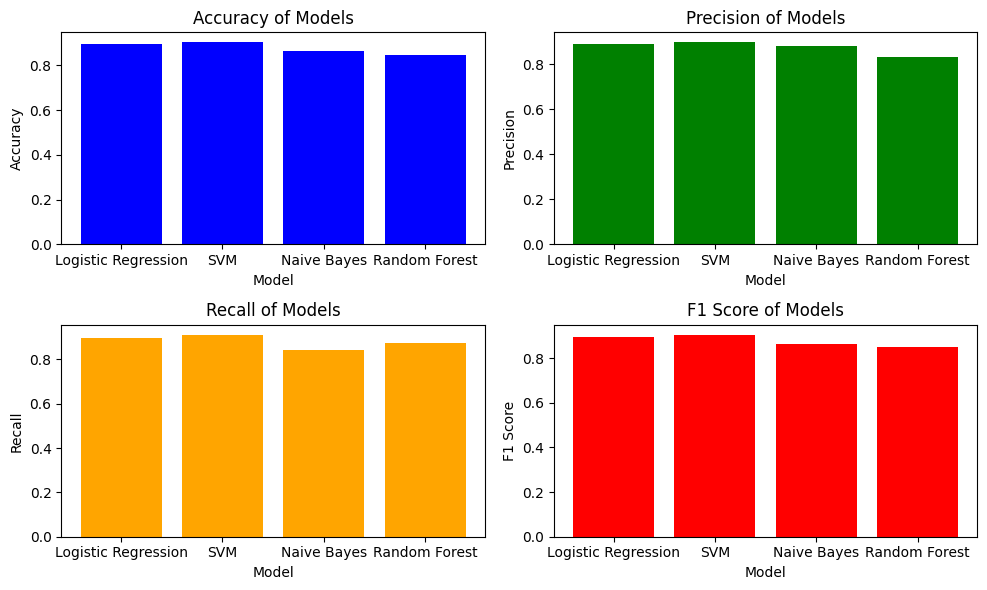

In [8]:
# Plot performance metrics for each model
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precisions, color='green')
plt.title('Precision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recalls, color='orange')
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='red')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()